Download Dataset

In [ ]:
import kagglehub

path = kagglehub.dataset_download("msambare/fer2013")
print(path)


Using Colab cache for faster access to the 'fer2013' dataset.
/kaggle/input/fer2013


Folder Structure

In [ ]:
import os
os.listdir(path)


['test', 'train']

Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


Parameters


In [ ]:
IMG_SIZE = 48
BATCH_SIZE = 64
NUM_CLASSES = 7
EPOCHS = 50


Data Preprocessing + Augmentation

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    path + "/train",
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    path + "/test",
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


CNN Model Architecture

In [ ]:
model = Sequential([

    Conv2D(64, (3,3), activation='relu', input_shape=(48,48,1)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(NUM_CLASSES, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile Model

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,474,759 (9.44 MB)

 Trainable params: 2,472,839 (9.43 MB)

 Non-trainable params: 1,920 (7.50 KB)

Train the Model

In [ ]:
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 231s 491ms/step - accuracy: 0.1686 - loss: 2.9023 - val_accuracy: 0.2410 - val_loss: 1.9589
Epoch 2/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 62s 138ms/step - accuracy: 0.1966 - loss: 2.4348 - val_accuracy: 0.2944 - val_loss: 1.7690
Epoch 3/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 62s 138ms/step - accuracy: 0.2180 - loss: 2.2570 - val_accuracy: 0.2976 - val_loss: 1.7417
Epoch 4/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 62s 139ms/step - accuracy: 0.2256 - loss: 2.1576 - val_accuracy: 0.3001 - val_loss: 1.7260
Epoch 5/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 62s 139ms/step - accuracy: 0.2292 - loss: 2.0918 - val_accuracy: 0.3188 - val_loss: 1.6857
Epoch 6/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 62s 138ms/step - accuracy: 0.2364 - loss: 2.0495 - val_accuracy: 0.2810 - val_loss: 1.7449
Epoch 7/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 63s 140ms/step - accuracy: 0.2510 - loss: 1.9760 - val_accuracy: 0.3144 - val_loss: 1.6896
Epoch 8/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 62s 137ms/step - accuracy: 0.2677 - loss: 

Plot Accuracy & Loss


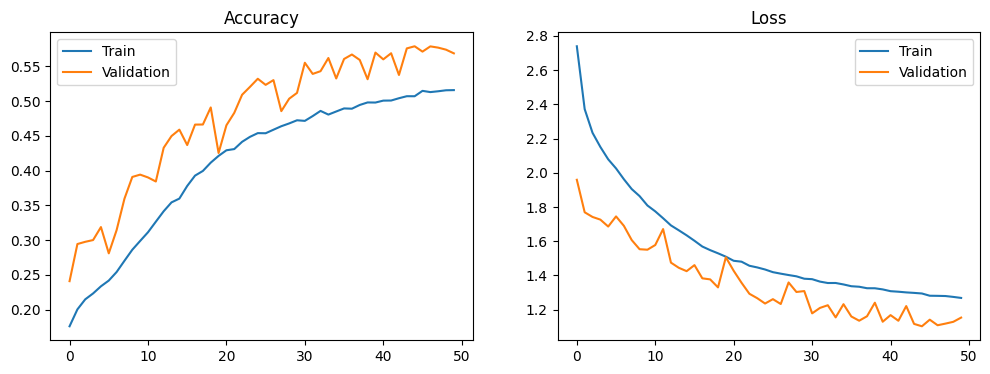

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()

plt.show()


Evaluate Model

In [ ]:
loss, acc = model.evaluate(test_generator)
print("Test Accuracy:", acc*100)


113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.5642 - loss: 1.1749
Test Accuracy: 56.84034824371338


Save Model


In [ ]:
model.save("fer2013_emotion_model.h5")


Predict Emotion from Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


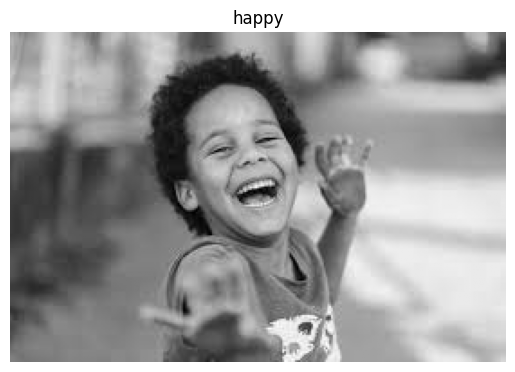

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Labels
emotion_labels = list(train_generator.class_indices.keys())

# Read original image
img = cv2.imread("face.jpg", cv2.IMREAD_GRAYSCALE)

# Prepare image for model
img_model = cv2.resize(img, (48, 48))
img_model = img_model / 255.0
img_model = img_model.reshape(1, 48, 48, 1)

# Predict
pred = model.predict(img_model)
emotion = emotion_labels[np.argmax(pred)]

# Show original image only
plt.imshow(img, cmap='gray')
plt.title(emotion)
plt.axis('off')
plt.show()
